# Customers churn in a telecomunications company


MÓDULO VIII: TÉCNICAS ANALÍTICAS PARA EL DATA-DRIVEN DECISION MAKING

**Autor**: Iván Reyes laguna
**Fecha de entrega:** 30/04/2023

**Datos**: Churn in telco (https://www.kaggle.com/blastchar/telco-customer-churn/download)

**Problema**: El objetivo es comprender el comportamiento de los clientes de una compañia de telecomunicaciones para poder predecir, y por lo tanto intentar evitar, su fuga.





## Contenido del Notebook:

#### Parte 1: Exploratory Data Analysis(EDA)

#### Parte 2: Feature Engineering and Data Cleaning

2.1)Creación de nuevas variables

2.2)Selección de variables

2.3)Transformaciones de variables previas al modelado

#### Parte 3: Clustering

3.1)K-means

#### Parte 4: Modelos de clasificación

4.1)Regresión logística

4.2) Xgboost

#### Parte 5: Medición

5.1)Validación cruzada

5.2)Matriz de confusión

#### Conclusión

## Carga del Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [405]:
import io
data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

## Parte 1: Exploratory Data Analysis(EDA)

Echamos una vista preliminar a los datos

In [406]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


 Nos gustaría tener un listado de todas las variables que tenemos en un nuestro dataset.


In [407]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

 Revisamos de que tipos son nuestras variables.

In [408]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Vemos que *'TotalCharges'* esta como cadena y debemos convertirla a numerica.

Revisamos los valores nulos de nuestro dataset.

In [409]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observamos que existen 11 registros en *'TotalCharges'* sin cargos que podría interpretarse como NUEVOS CLIENTES sin aún facturación.

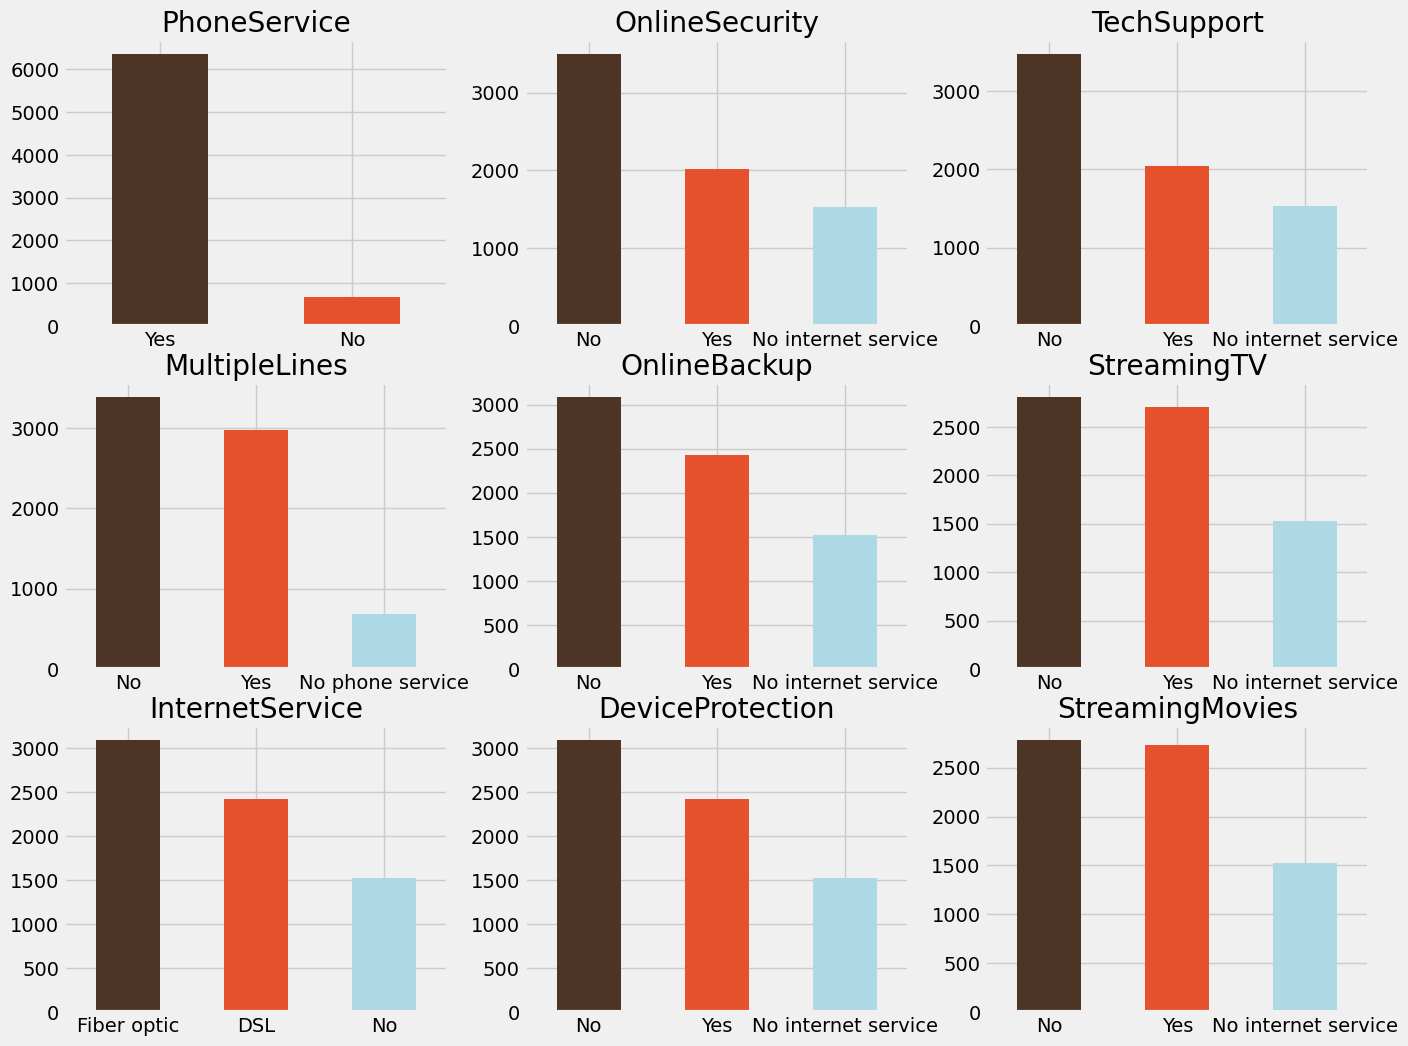

In [410]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

colors = ['#4D3425', '#E4512B', '#ADD8E6']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i,0], rot=0, color=colors)
    elif i >= 3 and i < 6:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-3,1], rot=0, color=colors)
    elif i < 9:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-6,2], rot=0, color=colors)
    ax.set_title(item)

Agrupar las categorías *'No internet service'* y *'No phone service'* en la categoría *'No'* porque equivalen a que no tienen ese servicio.

Las variables son ['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

Text(0.5, 1.0, '# of Customers by Contract Type')

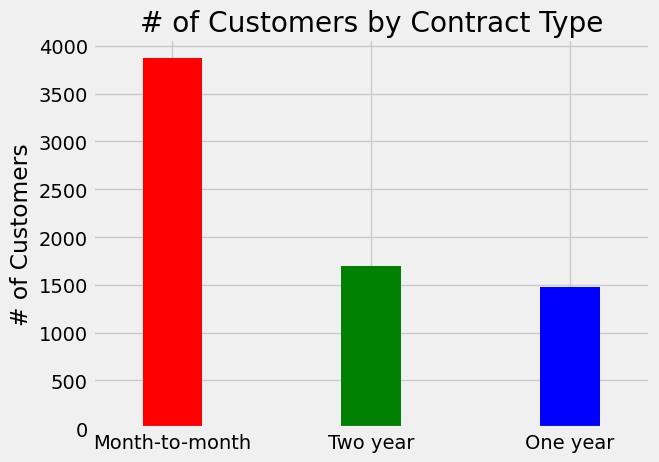

In [411]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=['red', 'green', 'blue'])
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Como podemos ver en este gráfico, la mayoría de los clientes son en el contrato de mes a mes. Si bien hay el mismo número de clientes en los contratos de 1 año y 2 años.

Text(0.5, 1.0, 'Two Year Contract')

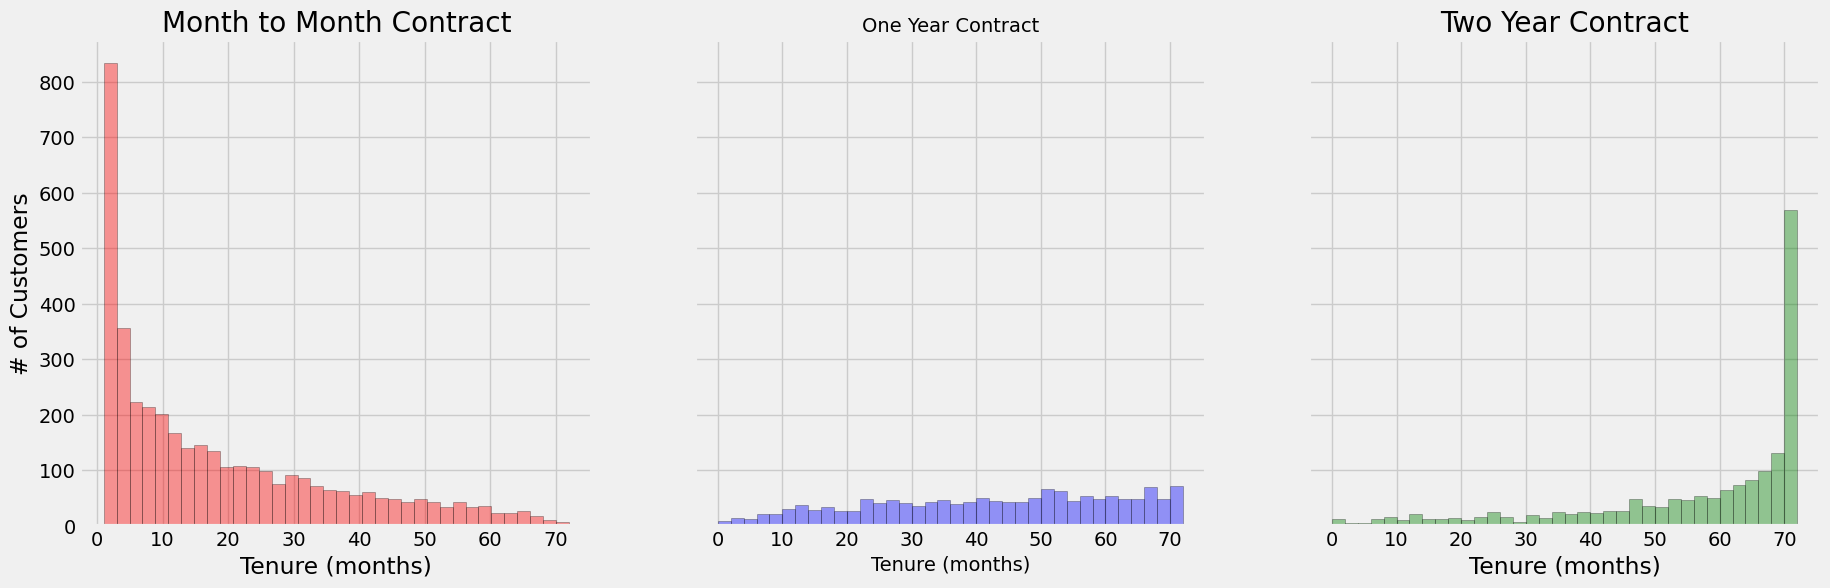

In [412]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'red',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Curiosamente, la mayoría de los contratos mensuales duran 1-2 meses, mientras que los contratos de 2 años tienden a durar aproximadamente 70 meses. Esto muestra que los clientes que toman un contrato más largo son más leales a la empresa y tienden a permanecer con él durante un período de tiempo más largo.

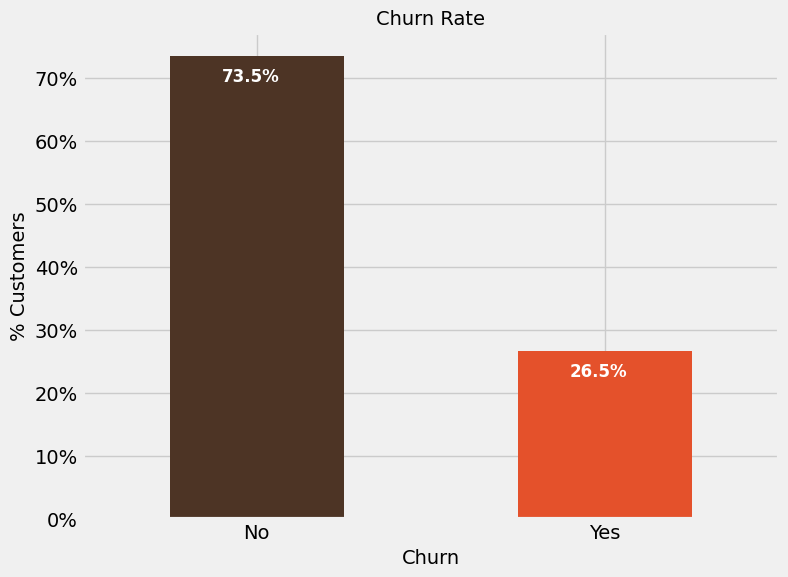

In [413]:
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',)


En nuestros datos, el 74% de los clientes no se marchan de a compañia. Claramente, los datos están sesgados, ya que esperaríamos que una gran mayoría de los clientes no se muevan. Es importante tener en cuenta nuestro modelado, ya que el desbalanceo podría conducir a muchos falsos negativos. Veremos en la sección de modelado sobre cómo evitar la asimetría en los datos.

<Axes: xlabel='Churn', ylabel='tenure'>

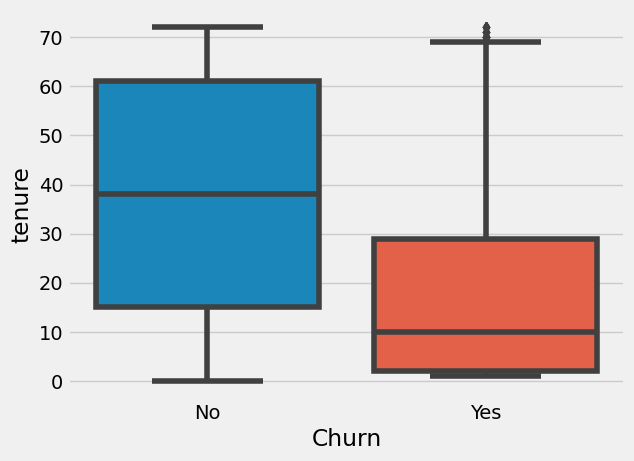

In [414]:
sns.boxplot(x = data.Churn, y = data.tenure)

Como podemos ver en estos diagrama de cajas, los clientes que no se van, logicamente tienden a permanecer durante más tiempo con el compañia de telecomunicaciones

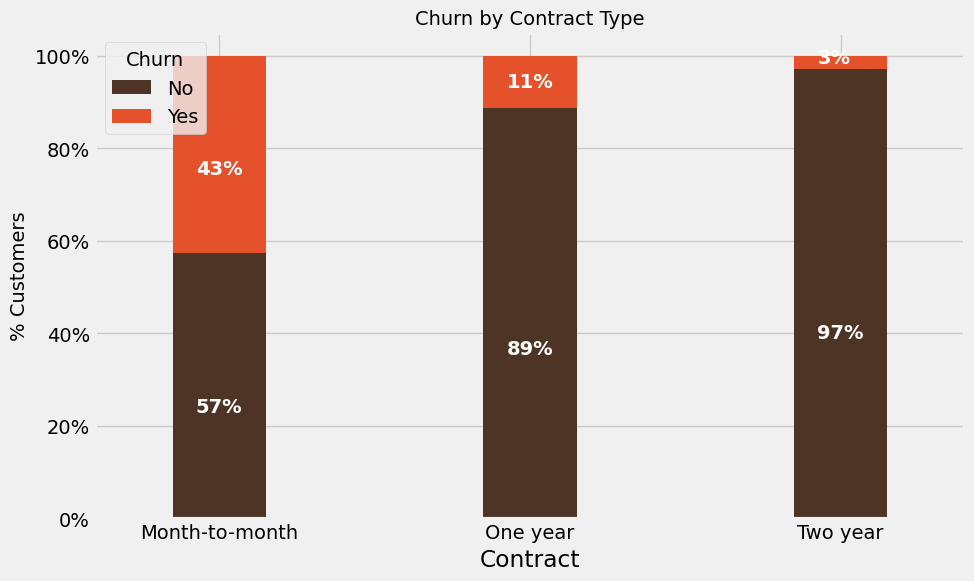

In [415]:
colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Los clientes que tienen un contrato mes a mes tienen una tasa de rotación muy alta.

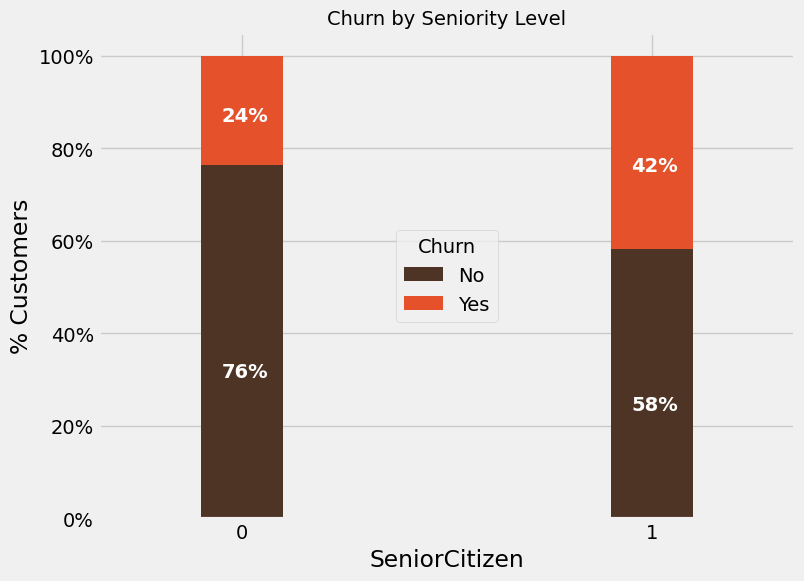

In [416]:
colors = ['#4D3425','#E4512B']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Las personas mayores tienen una tasa de rotación alta con una mayor presencia en la escasa población en proporción que se mueven.

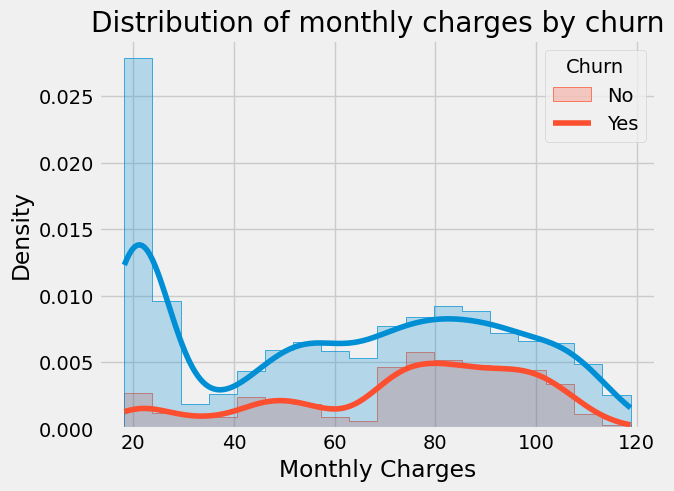

In [417]:
sns.histplot(data=data, x="MonthlyCharges", hue="Churn", kde=True, element="step", stat="density")
plt.title("Distribution of monthly charges by churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend(title="Churn", labels=["No", "Yes"])

El mayor % de los clientes se marchan cuando los cargos mensuales son altos.

In [418]:
# Modificamos el tipo de "TotalCharges" a númerica.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')


In [419]:
# Reemplazar los valores nulos en la columna "TotalCharges" con 0
data['TotalCharges'].fillna(0, inplace=True)


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

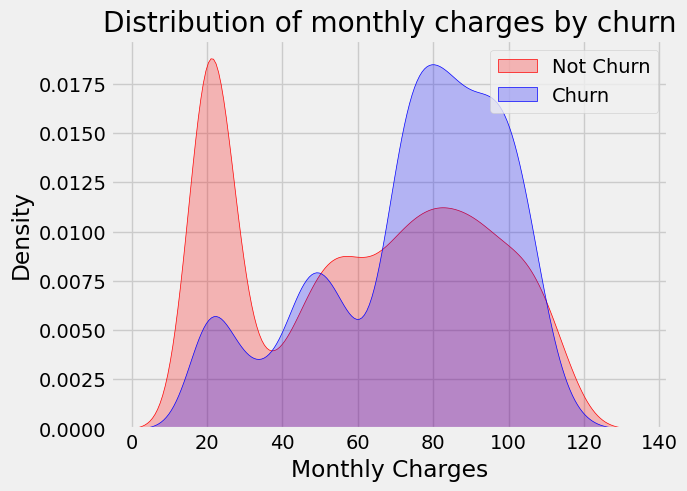

In [420]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Este gráfico tiene sentido porque podemos interpretar que valores altos de esta variable son para los clientes que no se marchan, permanecens leales y contentos con la compañia.

Text(0.5, 1.0, 'Distribution of total charges by churn')

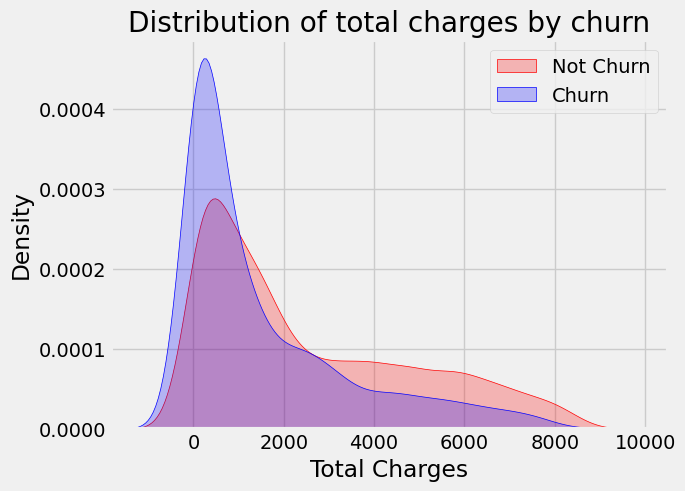

In [421]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')


Total Charges está altamente correlacionado con Monthly Charges, lo que significa que es posible que se esté duplicando la información si se incluyen ambas variables en el modelo. Además, si otras variables están altamente correlacionadas con Total Charges, es posible que el modelo tenga dificultades para determinar cuál es la verdadera causa de la variación en la variable objetivo.

 Se puede considerar en parte que una se explica por la otra y podriamos simplicar nuestro modelo eliminadola de nuestro modelo.


## Parte 2: Feature Engineering and Data Cleaning




In [422]:
# Agrupamos las categorias en No que vimos en el análisis exploratorio
['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','OnlineSecurity', 'MultipleLines']

['OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'OnlineSecurity',
 'MultipleLines']

In [423]:
data['OnlineBackup'] = data['OnlineBackup'].replace(['No internet service'], 'No')


In [424]:
data['DeviceProtection'] = data['DeviceProtection'].replace(['No internet service'], 'No')


In [425]:
data['TechSupport'] = data['TechSupport'].replace(['No internet service'], 'No')


In [426]:
data['StreamingTV'] = data['StreamingTV'].replace(['No internet service'], 'No')

In [427]:
data['StreamingMovies'] = data['StreamingMovies'].replace(['No internet service'], 'No')

In [428]:
data['OnlineSecurity'] = data['OnlineSecurity'].replace(['No internet service'], 'No')


In [429]:
data['MultipleLines'] = data['MultipleLines'].replace(['No phone service'], 'No')

CustomerID y TotalCharges no aportarán valor a nuestro análisis asi que la eliminamos.

In [430]:
data = data.drop(['customerID', 'TotalCharges'], axis=1)

**Aplicamos get dummies**

La transformación de variables categóricas en variables numéricas es importante en el proceso de análisis de datos y modelado, ya que muchos algoritmos de aprendizaje automático solo pueden manejar datos numéricos. La técnica de "get dummies" es una forma común de transformar variables categóricas en variables numéricas.

In [431]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [432]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


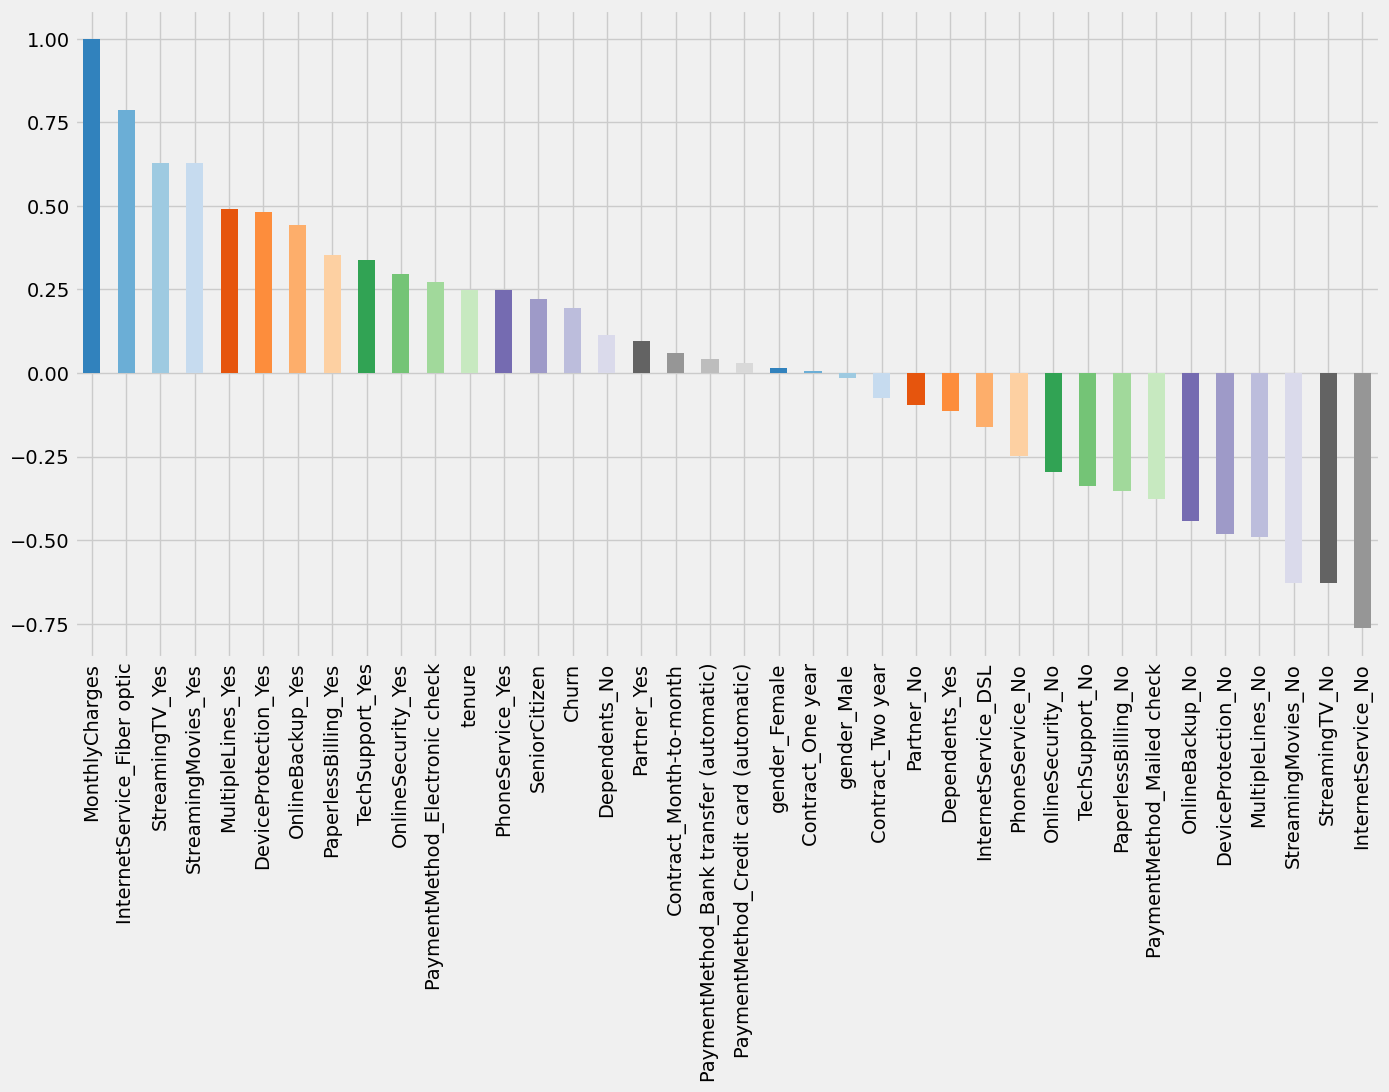

In [433]:
plt.figure(figsize=(15,8))
cmap = plt.get_cmap('tab20c')
df_dummies.corr()['MonthlyCharges'].sort_values(ascending = False).plot(kind='bar', color=cmap(range(20)))
plt.show()

Con esta representación podemos hacernos una idea los paquetes de los servicios que pueden encarcer la factura mensual. A mayor relación positiva mayor incremento de la factura.

En este orden descedente, fibra optica ,los paquetes de streaming y los servicios tecnicos de soporte.

**La trampa de las variables ficticias**

En el caso de que se tengan columnas altamente correlacionadas después de aplicar get_dummies, es posible que se esté generando lo que se conoce como la trampa de las variables ficticias (dummy variable trap). Esta trampa ocurre cuando se incluye una columna redundante en el modelo debido a la alta correlación con otra columna.

Para evitar la trampa de las variables ficticias, se debe eliminar una de las columnas altamente correlacionadas después de aplicar get_dummies. 

Un enfoque común es eliminar la columna con la menor cantidad de información. Por ejemplo, si se tiene una variable categórica "color" con tres valores posibles ("rojo", "verde" y "azul"), se generarán dos columnas "color_rojo" y "color_verde" después de aplicar get_dummies. En este caso, se puede eliminar una de las columnas para evitar la trampa de las variables ficticias.

In [489]:
df_dummies_original = df_dummies.copy()


In [435]:
# Calcular la matriz de correlación
corr_matrix = df_dummies.corr().abs()

# Seleccionar triángulo superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontrar índices de variables con correlación mayor a 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Eliminar variables altamente correlacionadas
df_dummies.drop(df_dummies[to_drop], axis=1, inplace=True)

In [436]:
to_drop

['gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'PaperlessBilling_Yes']

In [437]:
print(df_dummies.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'gender_Female',
       'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No',
       'StreamingMovies_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


**Reescalamos nuestro dataset**

In [438]:
from sklearn.preprocessing import MinMaxScaler

In [439]:
scaler = MinMaxScaler()
x = df_dummies.drop(['Churn'], axis=1)
x = scaler.fit_transform(x)
x = np.log(x + 1) # aplicar transformación logarítmica
y = df_dummies.loc[:,['Churn']]

## Parte 3: Clustering

In [440]:
# Selección de variable para Clusterizar

Iniciamos nuestro Cluster

In [441]:
from sklearn.cluster import KMeans

In [442]:
kmeans = KMeans(n_clusters=3) # Inicialización

kmeans_fitted_rescaled = kmeans.fit(x)

### Método de Elbow:

Podemos usar este método para seleccionar valor de k

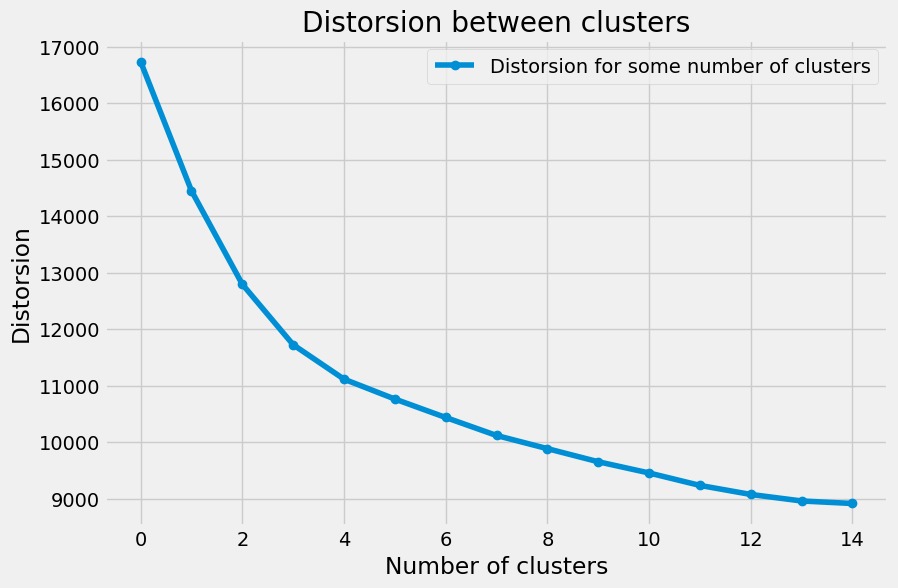

In [443]:
cluster_distorsion = []

for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(x)
    cluster_distorsion.append(test_sklearn.inertia_)
    
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

In [444]:
# Añadimos la columna de etiqueta del resultado de nuestro cluster

In [445]:
df_dummies['Cluster_Kmeans_scaled'] = kmeans_fitted_rescaled.predict(x)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,InternetService_DSL,...,StreamingMovies_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster_Kmeans_scaled
0,0,1,29.85,0,1,0,1,1,1,1,...,1,1,0,0,0,0,0,1,0,1
1,0,34,56.95,0,0,1,1,0,1,1,...,1,0,1,0,1,0,0,0,1,0
2,0,2,53.85,1,0,1,1,0,1,1,...,1,1,0,0,0,0,0,0,1,1
3,0,45,42.30,0,0,1,1,1,1,1,...,1,0,1,0,1,1,0,0,0,0
4,0,2,70.70,1,1,1,1,0,1,0,...,1,1,0,0,0,0,0,1,0,1


In [446]:
# ¿ Cómo se distribuye nuestros datos? ¿Diferencian bien con 3 k?

In [447]:
df_dummies.Cluster_Kmeans_scaled.value_counts()

1    3186
0    2202
2    1655
Name: Cluster_Kmeans_scaled, dtype: int64

In [448]:
mean_cluster = df_dummies.groupby('Cluster_Kmeans_scaled').mean()
mean_cluster

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,InternetService_DSL,...,StreamingTV_No,StreamingMovies_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Cluster_Kmeans_scaled,,,,,,,,,,,,,,,,,,,,,
0,0.135332,53.767030,82.789986,0.096730,0.500000,0.319709,0.600817,0.140327,0.436876,0.556312,...,0.330609,0.319255,0.064033,0.464124,0.471844,0.391008,0.336512,0.337875,0.195277,0.130336
1,0.248588,19.096673,74.108051,0.476146,0.493095,0.651287,0.836472,0.103264,0.564972,0.334275,...,0.613936,0.613308,0.982423,0.015694,0.001883,0.254551,0.143440,0.134652,0.569994,0.151915
2,0.031420,29.458006,22.782356,0.083988,0.493051,0.520846,0.570997,0.026586,0.791541,0.079154,...,0.998187,0.999396,0.364955,0.242296,0.392749,0.725076,0.209063,0.210876,0.071903,0.508157


¿Habrá clusters con mayor probabilidad de Churn?

In [449]:
pd.crosstab(df_dummies.Cluster_Kmeans_scaled,df_dummies.Churn).style.background_gradient(cmap='summer_r')

Churn,0,1
Cluster_Kmeans_scaled,,
0,1989,213
1,1669,1517
2,1516,139


In [450]:
pd.crosstab(df_dummies.Cluster_Kmeans_scaled,df_dummies.Churn, normalize='index').style.background_gradient(cmap='summer_r')

Churn,0,1
Cluster_Kmeans_scaled,,
0,0.903270,0.096730
1,0.523854,0.476146
2,0.916012,0.083988


¿Podrías darle nombre a los 3 clusters que hemos obtenido?

0: Mejores ofertas con permanencia: Jóvenes con contratos larga duracion, facturas cheque por correo, los que menos pagan mes a mes

1: Clientes Corta duración contratos mes a mes, facturas Cheque electrónico, 

2: Clientes leales : con contratos larga duracion, facturas electronicas domiciliadas a debito o credito, mayores cargos mensuales


## Parte 4: Modelos de clasificación

Aplicamos SMOTE: es una técnica de sobre-muestreo que se utiliza para tratar el desequilibrio de clases en los datos de entrenamiento. En un problema de clasificación binaria, el desequilibrio de clases se produce cuando una de las clases tiene muchas más observaciones que la otra. En tales casos, el modelo de aprendizaje automático puede tener un sesgo hacia la clase mayoritaria y no ser capaz de generalizar bien a la clase minoritaria.

In [451]:
from imblearn.over_sampling import SMOTE
# Instanciar SMOTE y aplicarlo solo en el conjunto de entrenamiento
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x, y)
# Verificar los nuevos tamaños de los conjuntos de entrenamiento
print(f"Tamaño de x antes de SMOTE: {x.shape}")
print(f"Tamaño de y antes de SMOTE: {y.shape}")
print(f"Tamaño de x después de SMOTE: {x_sm.shape}")
print(f"Tamaño de y después de SMOTE: {y_sm.shape}")

Tamaño de x antes de SMOTE: (7043, 25)
Tamaño de y antes de SMOTE: (7043, 1)
Tamaño de x después de SMOTE: (10348, 25)
Tamaño de y después de SMOTE: (10348, 1)


In [452]:
from sklearn.model_selection import train_test_split


In [453]:
x_train,x_test, y_train,y_test=train_test_split(x_sm,y_sm, test_size=0.3,random_state=42)


### Regresión logística

In [454]:
from sklearn.linear_model import LogisticRegression #logistic regression

In [455]:
model_lr = LogisticRegression()

model_lr.fit(x_train,y_train)

preds = model_lr.predict(x_test)

In [456]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix


In [457]:
# Calcular la precisión
accuracy = accuracy_score(y_test, preds)
accuracy 

# Calcular el recall
recall = recall_score(y_test, preds)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, preds)

accuracy
recall
confusion


array([[1184,  390],
       [ 279, 1252]])

In [458]:
accuracy

0.7845410628019324

In [459]:
recall

0.8177661659046375

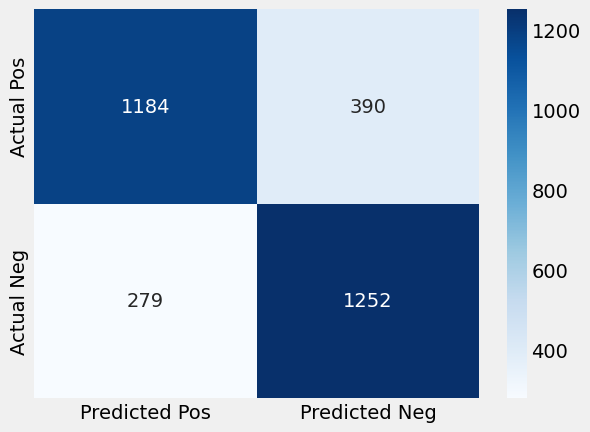

In [460]:
# Obtener la matriz de confusión
confusion = confusion_matrix(y_test,preds)

# Crear un DataFrame con la matriz de confusión
confusion_df = pd.DataFrame(confusion, index=['Actual Pos','Actual Neg'], columns=['Predicted Pos','Predicted Neg'])

# Crear un heatmap con el DataFrame de la matriz de confusión
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')

# Mostrar el plot
plt.show()

### XG BOOST

In [461]:
from xgboost import XGBClassifier
from sklearn import metrics

model = XGBClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.8586151368760064

In [462]:
metrics.recall_score(y_test, preds)

0.8556499020248204

Obtenemos mejores métricas con este modelo 

In [463]:
from sklearn.metrics import roc_auc_score

# Predecir probabilidades en conjunto de entrenamiento y prueba
probs_train = model.predict_proba(x_train)
probs_test = model.predict_proba(x_test)

# Obtener el AUC en conjunto de entrenamiento y prueba
auc_train = roc_auc_score(y_train, probs_train[:, 1])
auc_test = roc_auc_score(y_test, probs_test[:, 1])

print("AUC en conjunto de entrenamiento:", auc_train)
print("AUC en conjunto de prueba:", auc_test)


AUC en conjunto de entrenamiento: 0.9905558986793546
AUC en conjunto de prueba: 0.9362617717531043


## Parte 5: Medición

Existe una diferencia notoria sintoma de overfitting, cuestión que vamos a intentar reducir a continuación.

**Aplicamos técnica de validación cruzada y Regularizaciín L1-L2**

In [464]:
from sklearn.model_selection import GridSearchCV

In [465]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200]
}

In [466]:
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [467]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Crear objeto clasificador
xgb_clf = xgb.XGBClassifier()

# Definir los hiperparámetros a ajustar
params = {'learning_rate': [0.1, 0.2, 0.3],
          'n_estimators': [100, 200, 300],
          'max_depth': [3, 4, 5],
          'lambda': [0, 1, 2]}

# Aplicar validación cruzada con GridSearchCV
grid_clf = GridSearchCV(xgb_clf, params, cv=5, scoring='roc_auc')
grid_clf.fit(x_train, y_train)

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_clf.best_params_
best_score = grid_clf.best_score_

Se toma unos 7 minutos.

In [468]:

# Entrenar el modelo con los mejores hiperparámetros
xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = xgb_clf.predict(x_test)
y_pred_proba_test = xgb_clf.predict_proba(x_test)
y_pred_proba_train = xgb_clf.predict_proba(x_train)


# Obtener el AUC en conjunto de entrenamiento y prueba
auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
auc_test = roc_auc_score(y_test, y_pred_proba_test[:, 1])
# Imprimir la puntuación AUC en el conjunto de prueba
print("AUC en conjunto de entrenamiento:", auc_train)
print("AUC en conjunto de prueba:", auc_test)

AUC en conjunto de entrenamiento: 0.9611070317503889
AUC en conjunto de prueba: 0.9394634977097628


Hemos conseguido reducir la brecha llegando a diferencias más aceptables de overfitting

In [469]:
from sklearn.metrics import classification_report, confusion_matrix

# Obtener las predicciones en el conjunto de prueba
y_pred = xgb_clf.predict(x_test)

# Imprimir la matriz de confusión
print("Matriz de confusión en conjunto de prueba:")
print(confusion_matrix(y_test, y_pred))

# Imprimir las métricas de accuracy y recall
print("Accuracy en conjunto de prueba:", accuracy_score(y_test, y_pred))
print("Recall en conjunto de prueba:", recall_score(y_test, y_pred))

# Imprimir el classification report
print("Classification report en conjunto de prueba:")
print(classification_report(y_test, y_pred))


# La función accuracy_score calcula la precisión, recall_score calcula la recuperación y confusion_matrix calcula la matriz de confusión.







Matriz de confusión en conjunto de prueba:
[[1349  225]
 [ 214 1317]]
Accuracy en conjunto de prueba: 0.8586151368760064
Recall en conjunto de prueba: 0.8602220770738079
Classification report en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1574
           1       0.85      0.86      0.86      1531

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



La matriz de confusión en conjunto de prueba muestra que el modelo XGBoost clasifica correctamente el 85.86% de los casos, con un Recall del 86.02%, lo que indica que el modelo es bueno para predecir correctamente el churn o rotación de los clientes, que es nuestro objetivo de negocio.

La precision es de 0.85 en el conjunto de prueba, lo que significa que cuando el modelo predice que un cliente va a abandonar la empresa, es correcto el 85% de todos los que dijo que se marcharían.

Un recall de 0.86 en el conjunto de prueba, lo que significa que está identificando correctamente el 86% de los clientes que son realmente positivos y que abandonan la compañía. Este valor es bastante alto y sugiere que nuestro modelo es eficaz para detectar a los clientes que tienen más probabilidades de abandonar la compañía, lo que puede ser de gran utilidad para el equipo de marketing en su estrategia de retención.

En general, el modelo tiene un buen desempeño en la predicción de la rotación de los clientes, lo que puede ser de gran utilidad para el equipo de marketing. Sería recomendable que el equipo de marketing preste especial atención a aquellos clientes que el modelo predice que tienen una alta probabilidad de abandonar la empresa, para tomar medidas que les permitan retenerlos.

In [485]:
feature_names = df_dummies.columns.tolist()

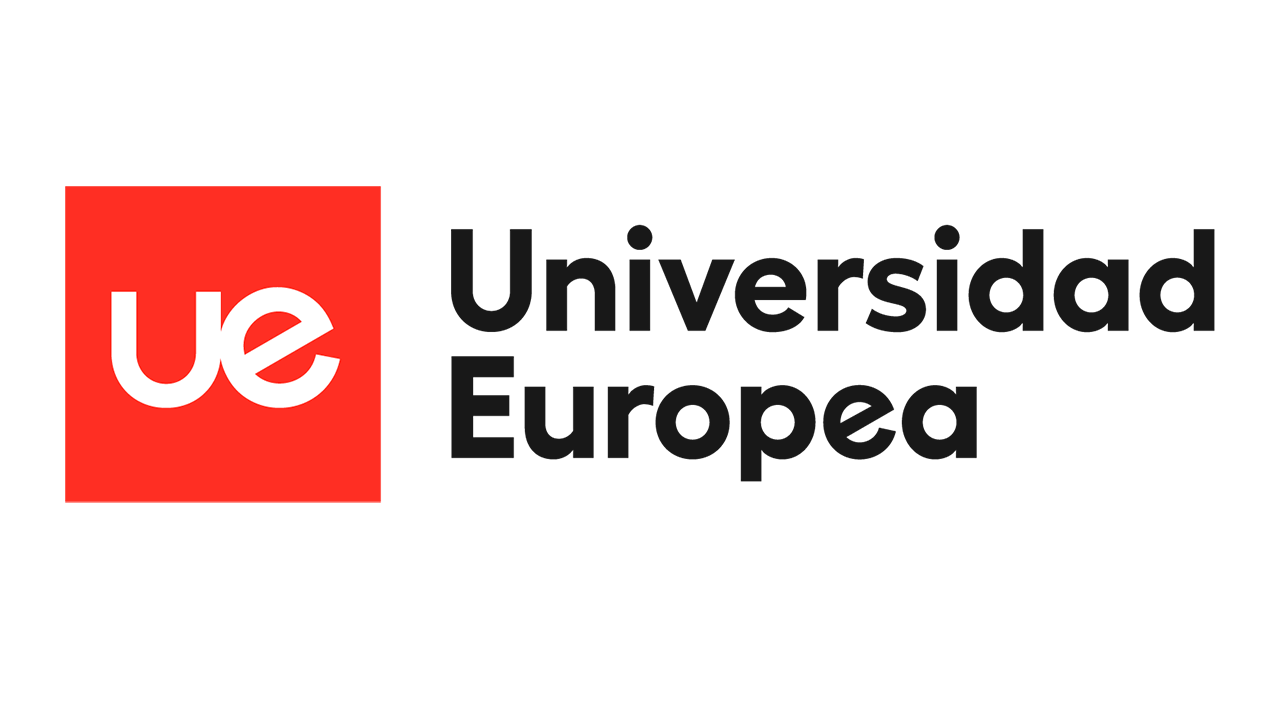

In [492]:
from IPython.display import Image
Image(filename='/content/universidad-europea-logo_poc9mEM.original.png')